<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Zoo.csv")

In [ ]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df['type'].nunique()

7

In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [ ]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
col=df.select_dtypes(include=np.number).columns

for i in col:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  upper_limit=Q3+(1.5*IQR)
  lower_limit=Q1-(1.5*IQR)
  df_new=df[(df[i]<upper_limit) & (df[i]>lower_limit)]

In [ ]:
df_new

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# no outliers detected

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['animal name','type'],axis=1)
y=df['type']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
kfold=KFold(n_splits=10, random_state=7, shuffle=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)

In [ ]:
model

KNeighborsClassifier(n_neighbors=10)

In [ ]:
results=cross_val_score(model, x,y, cv=kfold)

In [ ]:
results

array([0.72727273, 0.8       , 0.8       , 0.9       , 0.8       ,
       0.7       , 0.7       , 0.9       , 0.7       , 0.8       ])

In [ ]:
results.mean()

np.float64(0.7827272727272728)

In [ ]:
k_scores=[]

for k in range(1,41):
  knn_model=KNeighborsClassifier(n_neighbors=k)
  kfold=KFold(n_splits=10, random_state=10, shuffle=True)
  scores=cross_val_score(knn_model, x, y, cv=kfold)
  k_scores.append(scores.mean())

In [ ]:
k_scores

[np.float64(0.9709090909090909),
 np.float64(0.9418181818181818),
 np.float64(0.9236363636363636),
 np.float64(0.8936363636363638),
 np.float64(0.8545454545454545),
 np.float64(0.8545454545454545),
 np.float64(0.8445454545454545),
 np.float64(0.8145454545454545),
 np.float64(0.7945454545454547),
 np.float64(0.7845454545454545),
 np.float64(0.7845454545454545),
 np.float64(0.7845454545454545),
 np.float64(0.7645454545454545),
 np.float64(0.7645454545454545),
 np.float64(0.7645454545454545),
 np.float64(0.7545454545454545),
 np.float64(0.7545454545454545),
 np.float64(0.7545454545454545),
 np.float64(0.7545454545454545),
 np.float64(0.7545454545454545),
 np.float64(0.7445454545454545),
 np.float64(0.7354545454545455),
 np.float64(0.7254545454545454),
 np.float64(0.7154545454545455),
 np.float64(0.7054545454545454),
 np.float64(0.7054545454545454),
 np.float64(0.7054545454545454),
 np.float64(0.6954545454545454),
 np.float64(0.6554545454545455),
 np.float64(0.6454545454545455),
 np.float6

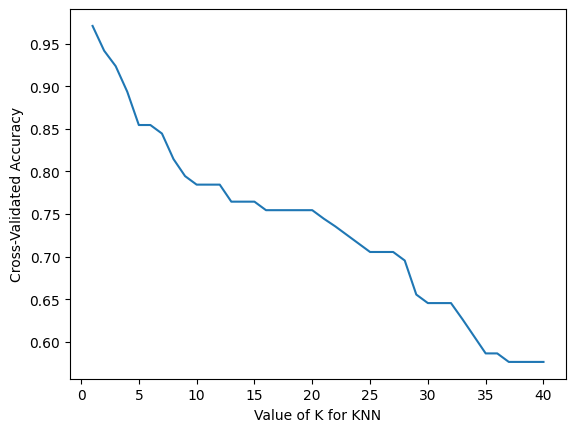

In [ ]:
plt.plot(range(1,41), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
best_k_value=(k_scores.index(max(k_scores))) + 1
best_k_value

1

In [ ]:
# best k value=1

In [ ]:
knn_final_model=KNeighborsClassifier(n_neighbors=best_k_value)
knn_final_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_final_model.predict(x_test)
y_pred

array([2, 7, 2, 5, 7, 4, 4, 3, 2, 2, 2, 2, 6, 1, 1, 2, 1, 5, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print("Accuracy score:" ,accuracy_score(y_test, y_pred))
print("F1 score:" ,f1_score(y_test, y_pred, average='macro'))
print("Precision score:" ,precision_score(y_test, y_pred, average='macro'))
print("Recall score:" ,recall_score(y_test, y_pred, average='macro'))

Accuracy score: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0


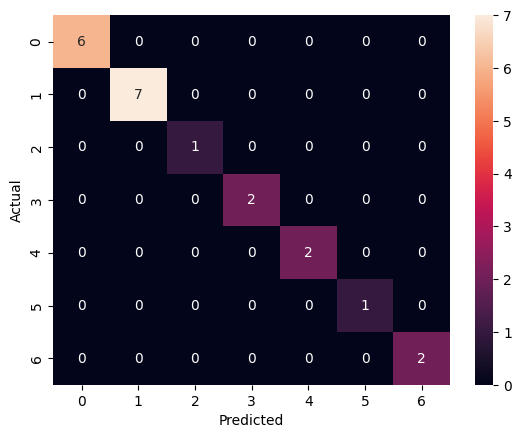

In [ ]:
import seaborn as sns

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

What are the key hyperparameters in KNN?



---
In K-Nearest Neighbors (KNN), the key hyperparameters are:

n_neighbors:
This specifies the number of nearest neighbors to consider. Choosing the right value for K is critical — a small K may lead to overfitting, while a large K can lead to underfitting.

weights:
Determines how the neighbors contribute to the prediction. It can be:

'uniform': all neighbors have equal influence

'distance': closer neighbors have more weight

metric:
Defines the distance function used to find neighbors. Common choices are:

'euclidean' (default when p=2)

'manhattan' (when p=1)

'minkowski' (generalized distance)

p:
The power parameter for the Minkowski metric.

p=1 → Manhattan distance

p=2 → Euclidean distance

algorithm:
This affects how the neighbors are searched. Options include:

'auto': lets the system choose the best method

'ball_tree', 'kd_tree', and 'brute'

Tuning these hyperparameters helps balance accuracy, performance, and computational efficiency in KNN.




What distance metrics can be used in KNN?

---
K-Nearest Neighbors (KNN) relies on distance metrics to measure the similarity between data points. Some commonly used distance metrics in KNN are:

Euclidean Distance (default for most cases):

Measures the straight-line (L2) distance between two points.

Best suited for continuous numerical data.

Manhattan Distance:

Also known as L1 distance or taxicab distance.

Calculates the sum of absolute differences between coordinates.

Useful when features are not continuous or have high-dimensional data.

Minkowski Distance:

A generalization of both Euclidean and Manhattan distances.

Controlled by a parameter p:

p = 1 → Manhattan distance

p = 2 → Euclidean distance

Chebyshev Distance:

Measures the maximum absolute difference across dimensions.

Useful when the movement is limited to grid-like patterns.

Hamming Distance:

Measures the number of positions at which corresponding values are different.

Typically used for categorical or binary features.

Cosine Distance:

Measures the angle between two vectors rather than their magnitude.

Ideal for text classification or high-dimensional sparse data.

Each metric has its own advantages depending on the nature and scale of the dataset.


